# Recommendation systems

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Data matrix
df = pd.read_csv('data.csv')
foods = df.columns
names = list(df.iloc[:,0])
df

['oscar', 'thiago', 'gabriel', 'hugo', 'semir', 'madani']


,user,beef,pork,chicken,tofu,quinoa,cucumber
0,oscar,0,0,0,1,0,1
1,thiago,1,1,0,0,1,0
2,gabriel,0,1,1,1,0,1
3,hugo,1,1,0,0,1,1
4,semir,1,0,0,0,0,1
5,madani,1,0,0,0,0,0


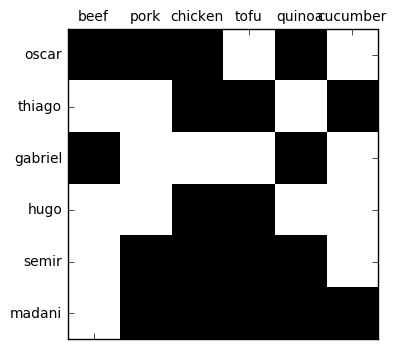

In [52]:
m = df.values[:,1:].astype(np.float)
def plot(m, ax=None):
    ax = ax or plt.subplot(111)
    ax.matshow(m, cmap='gray')
    ax.set_xticklabels(['']+df.columns)
    ax.set_yticklabels(['']+names)
plot(m)

In [73]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=4)
svd.fit(m)
u = svd.transform(m)
v = svd.components_

In [74]:
pred = u.dot(v)
pred[m==1] = -1

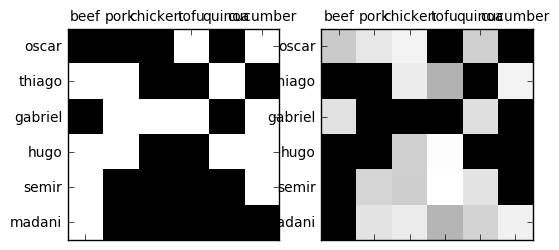

In [75]:
plot(m, plt.subplot(121))
plot(pred, plt.subplot(122))